In [53]:
import math, copy
import numpy as np
import matplotlib.pyplot as plt

In [54]:
data = plt.style.use('./deeplearning.mplstyle')
from lab_utils_uni import plt_house_x, plt_contour_wgrad, plt_divergence, plt_gradients

In [55]:
x_train = np.array([1.0, 2.0])
y_train = np.array([300.0, 500.0])

In [56]:
## Compute cost 

In [57]:
def compute_cost(x,y,w,b):
    m= x.shape[0]
    cost = 0

    for i in range(m):
        f_wb= w * x[i] + b
        cost = cost + (f_wb - y[i])**2
    total_cost = 1 / (2*m) * cost 

    return total_cost

In [58]:
def compute_gradient (x, y, w, b):
    m = x.shape [0]
    dj_dw = 0
    dj_db = 0

    for i in range(m):
        f_wb = w * x[i] + b
        dj_dw_i = (f_wb - y[i])* x[i]
        dj_db_i = (f_wb - y[i])
        dj_db = dj_db + dj_db_i
        dj_dw = dj_dw + dj_dw_i
    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_dw, dj_db

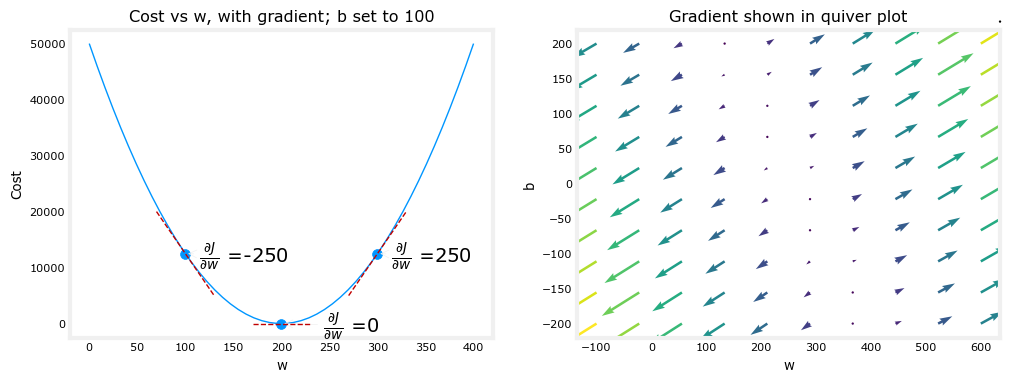

In [59]:
plt_gradients(x_train, y_train, compute_cost, compute_gradient)
plt.show()

In [60]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function):
    w = copy.deepcopy(w_in)
    J_history = []
    p_history = []
    b= b_in
    w= w_in

    for i in range(num_iters):
        dj_dw, dj_db = gradient_function(x,y,w,b)

        b = b - alpha * dj_db
        w = w - alpha * dj_dw

        if i < 100000: 
            J_history.append( cost_function(x, y, w, b))
            p_history.append( [w,b])
        if i% math.ceil(num_iters/10) == 0:
                print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
 
    return w, b, J_history, p_history #return w and J,w history for graphing

In [61]:
w_init = 0
b_init = 0

iterations = 100000
tmp_alpha = 1.0e-2
w_final, b_final, J_hist, p_hist = gradient_descent(x_train, y_train, w_init, b_init, tmp_alpha, iterations, compute_cost, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

Iteration    0: Cost 7.93e+04  dj_dw: -6.500e+02, dj_db: -4.000e+02   w:  6.500e+00, b: 4.00000e+00
Iteration 10000: Cost 6.74e-06  dj_dw: -5.215e-04, dj_db:  8.439e-04   w:  2.000e+02, b: 1.00012e+02
Iteration 20000: Cost 3.09e-12  dj_dw: -3.532e-07, dj_db:  5.714e-07   w:  2.000e+02, b: 1.00000e+02
Iteration 30000: Cost 1.42e-18  dj_dw: -2.393e-10, dj_db:  3.869e-10   w:  2.000e+02, b: 1.00000e+02
Iteration 40000: Cost 1.26e-23  dj_dw: -1.421e-12, dj_db:  7.105e-13   w:  2.000e+02, b: 1.00000e+02
Iteration 50000: Cost 1.26e-23  dj_dw: -1.421e-12, dj_db:  7.105e-13   w:  2.000e+02, b: 1.00000e+02
Iteration 60000: Cost 1.26e-23  dj_dw: -1.421e-12, dj_db:  7.105e-13   w:  2.000e+02, b: 1.00000e+02
Iteration 70000: Cost 1.26e-23  dj_dw: -1.421e-12, dj_db:  7.105e-13   w:  2.000e+02, b: 1.00000e+02
Iteration 80000: Cost 1.26e-23  dj_dw: -1.421e-12, dj_db:  7.105e-13   w:  2.000e+02, b: 1.00000e+02
Iteration 90000: Cost 1.26e-23  dj_dw: -1.421e-12, dj_db:  7.105e-13   w:  2.000e+02, b: 1.0

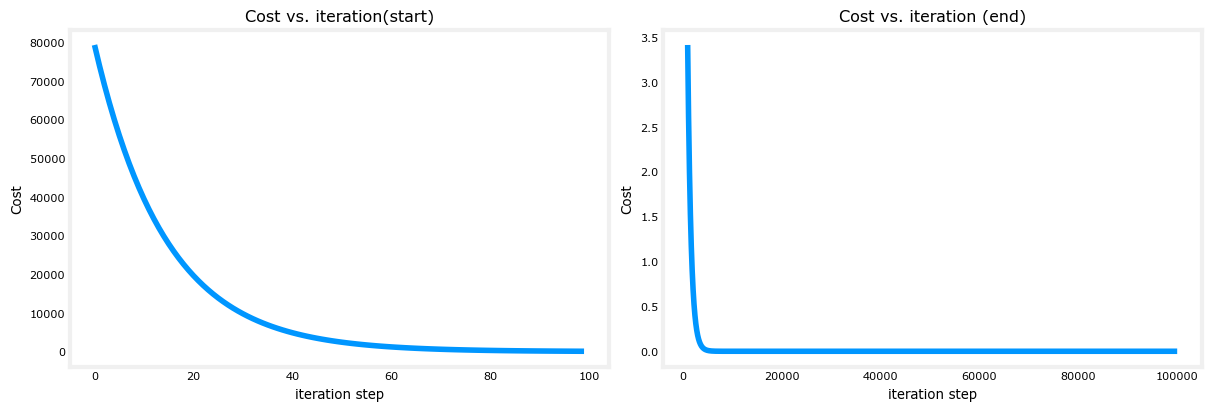

In [62]:
fig, (ax1, ax2) = plt.subplots(1,2, constrained_layout = True, figsize=(12,4))
ax1.plot(J_hist[:100])
ax2.plot(1000 + np.arange(len(J_hist[1000:])), J_hist[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
plt.show()

In [63]:
print(f"1000 sqft house prediction {w_final*1.0 + b_final:0.1f} Thousand dollars")
print(f"1200 sqft house prediction {w_final*1.2 + b_final:0.1f} Thousand dollars")
print(f"2000 sqft house prediction {w_final*2.0 + b_final:0.1f} Thousand dollars")

1000 sqft house prediction 300.0 Thousand dollars
1200 sqft house prediction 340.0 Thousand dollars
2000 sqft house prediction 500.0 Thousand dollars


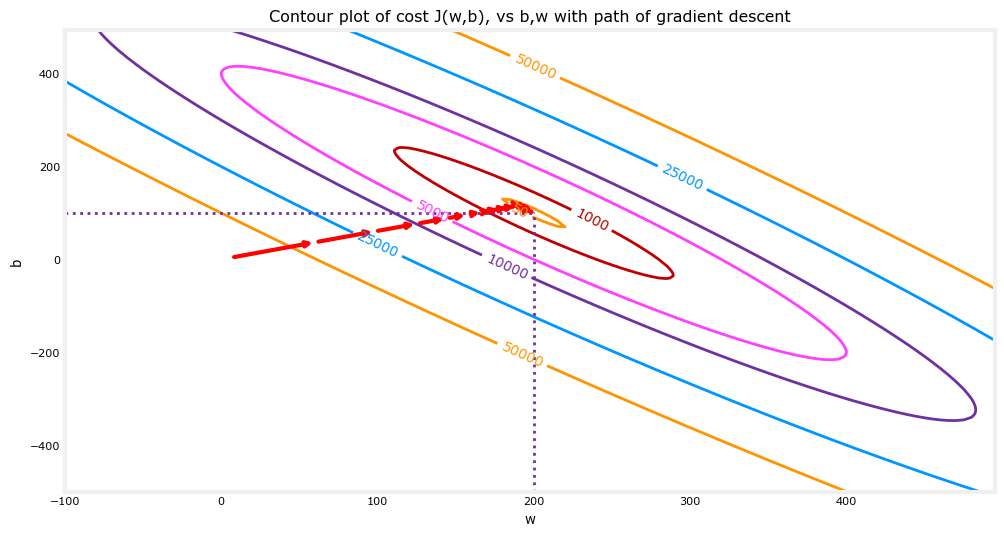

In [64]:
fig, ax = plt.subplots(1,1, figsize=(12, 6))
plt_contour_wgrad(x_train, y_train, p_hist, ax)

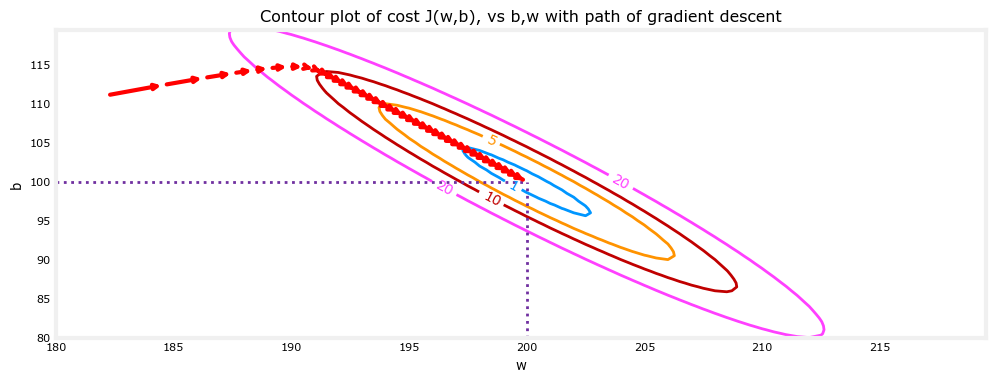

In [65]:
fig, ax = plt.subplots(1,1, figsize=(12, 4))
plt_contour_wgrad(x_train, y_train, p_hist, ax, w_range=[180, 220, 0.5], b_range=[80, 120, 0.5],
            contours=[1,5,10,20],resolution=0.5)

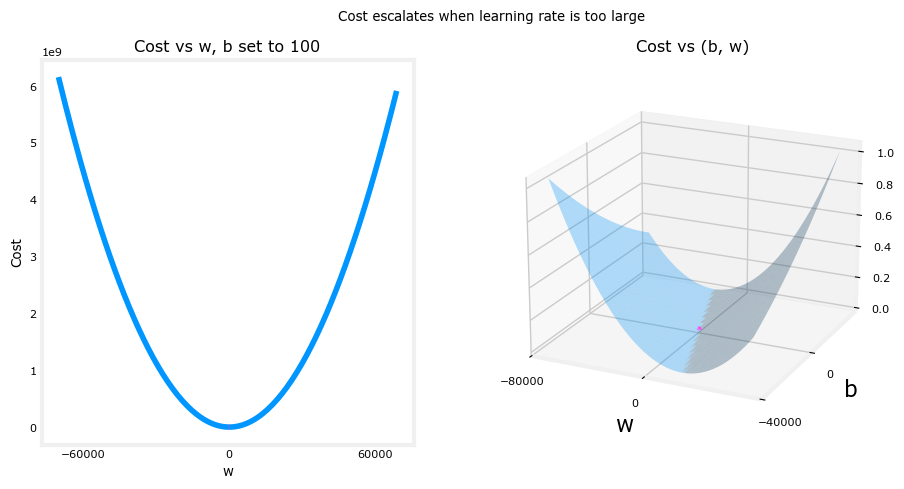

In [66]:
plt_divergence(p_hist, J_hist,x_train, y_train)
plt.show()